# Ноутбук c примерами работы со средой  Gym-GPN

##  Загрузка библиотек

In [1]:
import gym
import gym_gpn

In [2]:
from time import sleep
import numpy as np

## Создание объекта среды

In [3]:
env = gym.make('gpn-v0')

In [4]:
# создание инстанста виртуальной АЗС
env.create_thread(token = 'a7bf92fc-2bd6-4ab6-9180-9f403f8d490b')

# Методы среды `gym_gpn`

## `.step()` – запуск среды по шагам (итерациям)

### Один шаг

In [5]:
# Совершение одного шага в среде.
# Среда принимает действие и возвращает кортеж (observation, reward, done, info).
res = env.step(100)
res

({'cost': 35,
  'date_time': '2018-06-01T00:00:00',
  'price': 55.0,
  'volume': 82.43},
 4533.650000000001,
 False,
 {})

In [6]:
# observation
print('date_time: ', res[0]['date_time'])
print('price: ', res[0]['price'])
print('cost: ', res[0]['cost'])
print('volume: ', res[0]['volume'])

# reward, done, info
print('reward: ', res[1])
print('done (flag): ', res[2])
print('additional data: ', res[3])

date_time:  2018-06-01T00:00:00
price:  55.0
cost:  35
volume:  82.43
reward:  4533.650000000001
done (flag):  False
additional data:  {}


## `.reset()` – cброс среды к начальному состоянию

In [7]:
env.reset()
print(env.state)

None


# Пример агентной модели

## Загрузка библиотек

In [8]:
import sys
sys.path.append('./examples/agents/')
from random_walk import RandomWalkAgent

## RandomWalkAgent

In [9]:
agnt = RandomWalkAgent(env.low_price, env.high_price)

In [10]:
# действие
agnt.act()

39

In [11]:
%%time

done = env.done
ts = []
while not done:
    try:
        price = agnt.act()
        ob, reward, done, _ = env.step(price)
        ts.append([ob, reward])
    except:
        continue

CPU times: user 9.12 s, sys: 1.53 s, total: 10.7 s
Wall time: 10min 7s


In [12]:
env.cum_reward

33278630.79999996

# Visualize some data

In [13]:
import pandas as pd

In [19]:
X = []
for el in ts:
    X.append(el[0])

In [20]:
X = pd.DataFrame.from_dict(X)

In [22]:
X.drop(columns  = ['cost'], inplace = True)

In [24]:
X.date_time = pd.to_datetime(X.date_time)

In [28]:
X['reward'] = X.price.values * X.volume.values

In [33]:
X['year'] = X['date_time'].map(lambda x: x.year)

In [35]:
X['month'] = X['date_time'].map(lambda x: x.month)

In [36]:
X['day'] = X['date_time'].map(lambda x: x.day)

In [37]:
X['hour'] = X['date_time'].map(lambda x: x.hour)

In [43]:
X.head()

,date_time,year,month,hour,price,volume,reward
0,2018-06-01 00:00:00,2018,6,0,52.0,83.94,4364.88
1,2018-06-01 01:00:00,2018,6,1,49.0,55.72,2730.28
2,2018-06-01 02:00:00,2018,6,2,48.0,43.87,2105.76
3,2018-06-01 03:00:00,2018,6,3,30.0,52.19,1565.70
4,2018-06-01 04:00:00,2018,6,4,34.0,61.13,2078.42


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

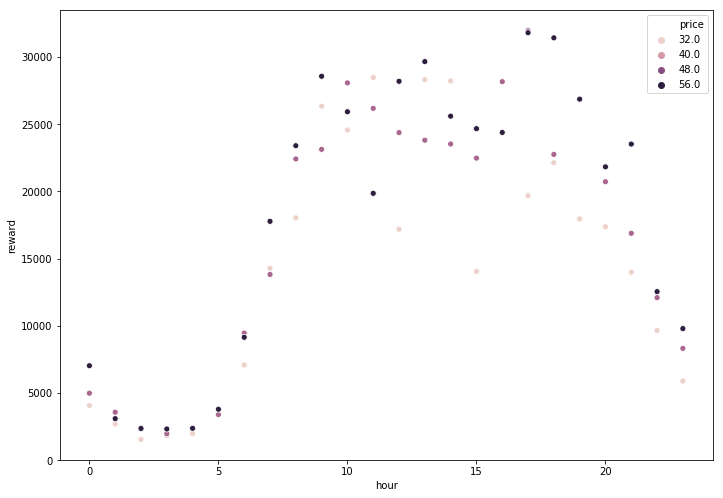

In [78]:
grouped = X.groupby(['price', 'hour'], as_index=False)['reward'].mean()

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = grouped.loc[grouped.price.isin([35, 45, 55])], x ='hour', y='reward', hue = 'price', ax = ax)